In [46]:
# **Sentiment Analysis**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('/Users/anurag/Downloads/Books_rating.csv')
data.head()

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

   review/time                                   review/summary  \
0    940636800           Nice collection of Julie Strain images   
1   1095724800                                Really Enjoyed It   
2   1078790400  Essential for every personal and Public Library   
3   1090713600  Phlip Nel gives silly Seuss a serious treatment   
4   1107993600                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

In [49]:
print(data.shape)

(3000000, 10)


In [50]:
test=data.head(1000)
test

Id                             Title  Price         User_id  \
0    1882931173    Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1    0826414346          Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2    0826414346          Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3    0826414346          Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4    0826414346          Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   
..          ...                               ...    ...             ...   
995  0375422811                   The Rabbi's Cat  16.93   AK12P9I5UPRZW   
996  0375422811                   The Rabbi's Cat  16.93  A1LS550MPTFUY3   
997  0375422811                   The Rabbi's Cat  16.93  A2W9NRDLQS4M09   
998  0375422811                   The Rabbi's Cat  16.93  A3RIJ0XJRU78ZZ   
999  0882899228  JFK: The Last Dissenting Witness    NaN  A2G4M1U3JERFQ6   

                            profileName review/helpfulness  review/score  \
0                 Jim of Oz "jim-of-oz"                7/7           4.0   
1                         Kevin Killian              10/10           5.0   
2                          John Granger              10/11           5.0   
3    Roy E. Perry "amateur philosopher"                7/7           4.0   
4       D. H. Richards "ninthwavestore"                3/3           4.0   
..                                  ...                ...           ...   
995                         Ex-pat Brit               5/21           1.0   
996      Ellamay Brasher "sidewardword"               1/15           3.0   
997                              Syrena              15/51           1.0   
998                     History Teacher               6/33           1.0   
999        bookdealers2 "I love books!"              25/28           4.0   

     review/time                                   review/summary  \
0      940636800           Nice collection of Julie Strain images   
1     1095724800                                Really Enjoyed It   
2     1078790400  Essential for every personal and Public Library   
3     1090713600  Phlip Nel gives silly Seuss a serious treatment   
4     1107993600                           Good academic overview   
..           ...                                              ...   
995   1268352000                     Unpleasant and disappointing   
996   1167782400                                    Grafic Novels   
997   1139270400                             Self-Serving Message   
998   1192752000             Not what it looks like on the cover.   
999   1005436800                    Jean Hill's Eye-Witness Story   

                                           review/text  
0    This is only for Julie Strain fans. It's a col...  
1    I don't care much for Dr. Seuss but after read...  
2    If people become the books they read and if "t...  
3    Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4    Philip Nel - Dr. Seuss: American IconThis is b...  
..                                                 ...  
995  This is a nasty, mean-spirited book that exhib...  
996  Our book club tried the Rabbi's Cat to see wha...  
997  This is the tale of a kindly Rabbi, his sweet ...  
998  As someone who is interested in different cult...  
999  Jean Hill saw President Kennedy shot and she b...  

[1000 rows x 10 columns]

In [51]:
most_reviewed = test['Title'].value_counts().head(10)
print(most_reviewed)

Title
Night World: Daughters Of Darkness                                   134
Cruel and Unusual (G K Hall Large Print Book Series (Cloth))         124
The Scarletti Curse (Candleglow)                                      97
HTML: The Complete Reference                                          55
The Rabbi's Cat                                                       40
The Food Of Love                                                      39
Whispers of the Wicked Saints                                         32
Eyewitness Travel Guide to Europe                                     27
Alaska Sourdough                                                      27
Building the timber frame house: The revival of a forgotten craft     19
Name: count, dtype: int64


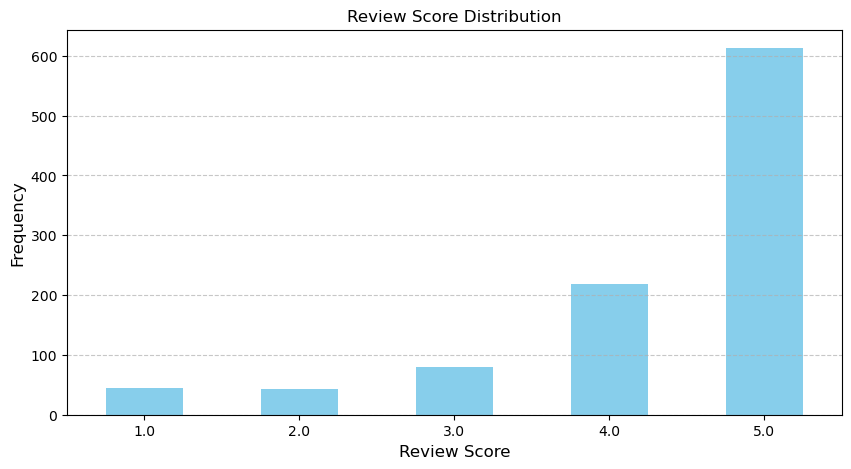

In [52]:
ax = test['review/score'].value_counts().sort_index().plot(
    kind='bar',
    title='Review Score Distribution',
    figsize=(10, 5),
    color='skyblue'
)

ax.set_xlabel('Review Score', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

In [53]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [55]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/anurag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anurag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/anurag/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
stemmer = PorterStemmer()

In [ ]:
# Tokenization
def tokenize_text(text):
    return word_tokenize(text.lower())

# Stemming
def stem_text(tokens):
    return [stemmer.stem(token) for token in tokens]

# Lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

# POS Tagging
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Bag of Words Model
def bag_of_words(texts):
    vectorizer = CountVectorizer()
    return vectorizer.fit_transform(texts)

# TF-IDF Vectorization
def tfidf_vectorization(texts):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(texts)

In [ ]:
test['tokenized_summary'] = test['review/summary'].apply(tokenize_text)
test['stemmed_summary'] = test['tokenized_summary'].apply(stem_text)
test['lemmatized_summary'] = test['review/summary'].apply(lemmatize_text)
test['pos_tagged_summary'] = test['review/summary'].apply(pos_tagging)
test['entities_summary'] = test['review/summary'].apply(extract_entities)

test['tokenized_text'] = test['review/text'].apply(tokenize_text)
test['stemmed_text'] = test['tokenized_text'].apply(stem_text)
test['lemmatized_text'] = test['review/text'].apply(lemmatize_text)
test['pos_tagged_text'] = test['review/text'].apply(pos_tagging)
test['entities_text'] = test['review/text'].apply(extract_entities)

In [ ]:
print(test[['review/summary', 'tokenized_summary', 'stemmed_summary', 'lemmatized_summary']].head())

In [ ]:
pip install textblob vaderSentiment wordcloud matplotlib

In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [ ]:
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def analyze_sentiment_vader(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

In [ ]:
test['sentiment_textblob'] = test['review/text'].apply(analyze_sentiment_textblob)
test['sentiment_vader'] = test['review/text'].apply(analyze_sentiment_vader)

In [ ]:
test['sentiment_class_textblob'] = test['sentiment_textblob'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
test['sentiment_class_vader'] = test['sentiment_vader'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [ ]:
print(test[['review/text', 'sentiment_textblob', 'sentiment_class_textblob']].head())

In [ ]:
positive_reviews = ' '.join(test[test['sentiment_class_textblob'] == 'positive']['review/text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

In [ ]:
negative_reviews = ' '.join(test[test['sentiment_class_textblob'] == 'negative']['review/text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

In [ ]:
plt.figure(figsize=(10, 5))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.tight_layout()
plt.show()

In [ ]:
textblob_sentiment_counts = test['sentiment_class_textblob'].value_counts()
vader_sentiment_counts = test['sentiment_class_vader'].value_counts()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# TextBlob Sentiment Distribution
axes[0].bar(textblob_sentiment_counts.index, textblob_sentiment_counts.values, color=['blue', 'green', 'red'])
axes[0].set_title('Sentiment Distribution (TextBlob)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Number of Reviews')
axes[0].set_ylim(0, max(textblob_sentiment_counts.values) + 10)

# VADER Sentiment Distribution
axes[1].bar(vader_sentiment_counts.index, vader_sentiment_counts.values, color=['blue', 'green', 'red'])
axes[1].set_title('Sentiment Distribution (VADER)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_ylim(0, max(vader_sentiment_counts.values) + 10)

plt.tight_layout()
plt.show()